In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from audiocraft.models import CompressionModel

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cu118)
    Python  3.8.18 (you have 3.8.10)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
/home/jongmin/.local/share/virtualenvs/audiocraft-ssbSDm-j/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model = CompressionModel.get_pretrained('facebook/encodec_32khz')

/home/jongmin/.local/share/virtualenvs/audiocraft-ssbSDm-j/lib/python3.8/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [14]:
encodec_loaded = torch.load('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.pt')

In [5]:
pr_loaded = torch.load('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav_pianoroll.pkl')

In [15]:
encodec_loaded['len']

33

In [5]:
encodec_loaded

{'len': 33,
 0: tensor([[[ 166,  166,   83,  ...,  942, 1968, 1828],
          [1931, 2044, 1926,  ..., 1115, 1115, 1150],
          [2019, 2019, 2009,  ..., 2015, 2004, 1645],
          [1951, 1951, 1854,  ...,  553, 1387,  412]]]),
 30: tensor([[[  66, 1634, 1146,  ..., 1721, 1204, 1204],
          [1955, 1115, 1460,  ..., 1201,  943, 1473],
          [1784, 1945, 1798,  ...,  582,  657, 1102],
          [ 715,  269, 1945,  ..., 1036,  323,  566]]]),
 60: tensor([[[ 580,  654,  391,  ...,  986,   42,  944],
          [ 945, 1116, 1646,  ...,  704, 1987, 1489],
          [1296, 1586,  861,  ..., 1240,  630, 1637],
          [ 615,  728, 1920,  ...,  253,  677, 1141]]]),
 90: tensor([[[1658,  443, 1095,  ..., 1419,  564,  944],
          [ 867, 1865,  661,  ...,  326, 1583, 1596],
          [1249, 2021,  933,  ..., 1276,  102, 1329],
          [ 553, 1661,  475,  ..., 1380,  339, 1848]]]),
 120: tensor([[[  66, 1460,  289,  ...,   42,  654, 1978],
          [1217, 1803, 1425,  ..., 132

In [7]:
decoded_encodec = model.decode(encodec_loaded[120])

In [8]:
pr_loaded['len']

33

In [9]:
from matplotlib import pyplot as plt

In [10]:
from IPython.display import Audio as IPAudio

In [21]:
IPAudio(decoded_encodec[0][:,320000:640000].detach().numpy(), rate=32000)

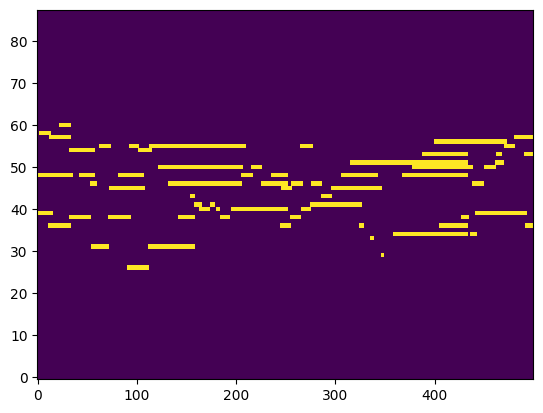

In [20]:
plt.imshow(pr_loaded[120][1][:,500:1000], origin='lower', aspect='auto', interpolation='nearest')

In [10]:
from audiocraft.data.midi_dataset import EnCodecTokenMIDIDataset

In [13]:
paths_loaded = torch.load('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/maestro-v3.0.0_split.pt')
dataset = EnCodecTokenMIDIDataset(paths_loaded['validation'])

  4%|▎         | 5/137 [00:00<00:02, 48.12it/s]

Length mismatch! Popping -2 index
/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_03_Track03_wav--1.midi
39 38
Length mismatch! Popping -2 index
/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID--AUDIO_16_R1_2004_03_Track03_wav.midi
12 11


 10%|█         | 14/137 [00:00<00:04, 25.94it/s]

Length mismatch! Popping -2 index
/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2004/MIDI-Unprocessed_XP_11_R1_2004_03-04_ORIG_MID--AUDIO_11_R1_2004_04_Track04_wav.midi
20 19


 36%|███▌      | 49/137 [00:01<00:02, 31.10it/s]

Length mismatch! Popping -2 index
/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2008/MIDI-Unprocessed_15_R2_2008_01-04_ORIG_MID--AUDIO_15_R2_2008_wav--4.midi
22 21


 54%|█████▍    | 74/137 [00:02<00:01, 32.83it/s]

Length mismatch! Popping -2 index
/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2011/MIDI-Unprocessed_16_R1_2011_MID--AUDIO_R1-D6_15_Track15_wav.midi
13 12


 72%|███████▏  | 98/137 [00:03<00:01, 25.80it/s]

Length mismatch! Popping -2 index
/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2015/MIDI-Unprocessed_R1_D1-1-8_mid--AUDIO-from_mp3_01_R1_2015_wav--2.midi
11 10
Length mismatch! Popping -2 index
/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2015/MIDI-Unprocessed_R1_D1-1-8_mid--AUDIO-from_mp3_03_R1_2015_wav--4.midi
19 18


100%|██████████| 137/137 [00:04<00:00, 27.44it/s]

Length mismatch! Popping -2 index
/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2018/MIDI-Unprocessed_Recital9-11_MID--AUDIO_09_R1_2018_wav--4.midi
10 9


In [16]:
a_en = torch.load('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_03_Track03_wav--1.pt')

In [24]:
encodec_tensors = []
for i in range(a_en['len']-1):
    encodec_tensors.append(a_en[i*30].squeeze(0))
encodec_tensors.append(a_en[-1].squeeze(0))

In [26]:
encodec_tensors.pop(-2)

tensor([[  66, 1453,   35,  ...,   83,   83,   83],
        [1600,  832, 2027,  ..., 2044, 2044, 2044],
        [2025, 2004,  435,  ..., 2019, 2019, 2019],
        [ 152,  452, 1394,  ..., 1770, 1770, 1770]])

In [27]:
len(encodec_tensors)

38

In [17]:
a_pr = torch.load('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_03_Track03_wav--1_pianoroll.pkl')

In [22]:
a_en.keys(), a_pr.keys()

(dict_keys(['len', 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, 960, 990, 1020, 1050, 1080, 1110, -1]),
 dict_keys(['len', 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, 960, 990, 1020, 1050, 1080, -1]))

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))

In [ ]:
model.decode(encodec_loaded[0]).shape

In [21]:
loaded = torch.load("/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2018/MIDI-Unprocessed_Chamber5_MID--AUDIO_18_R3_2018_wav--1_encodec.pt")

In [25]:
loaded[-1]

tensor([[[1453, 1453, 1634,  ...,  648, 1481,  993],
         [1941, 1994, 2017,  ..., 1956, 1938, 1938],
         [1726, 1903,  787,  ..., 1630,  423, 1945],
         [1840, 1477,  578,  ..., 1903, 1982, 1848]]], dtype=torch.int16)